In [1]:
!unzip /content/roads_coco.zip

Archive:  /content/roads_coco.zip
   creating: roads_coco/annotations/
  inflating: roads_coco/annotations/instances_default.json  
  inflating: roads_coco/annotations/train.json  
  inflating: roads_coco/annotations/val.json  
   creating: roads_coco/images/
  inflating: roads_coco/images/1.jpg  
  inflating: roads_coco/images/10.jpg  
  inflating: roads_coco/images/11.jpg  
  inflating: roads_coco/images/12.jpg  
  inflating: roads_coco/images/13.jpg  
  inflating: roads_coco/images/2.jpg  
  inflating: roads_coco/images/3.jpg  
  inflating: roads_coco/images/4.jpg  
  inflating: roads_coco/images/5.jpg  
  inflating: roads_coco/images/6.jpg  
  inflating: roads_coco/images/7.jpg  
  inflating: roads_coco/images/8.jpg  
  inflating: roads_coco/images/9.jpg  


In [2]:
import albumentations as A
import cv2

In [20]:
transform = A.Compose([
    A.geometric.resize.Resize(400,400) ,
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
], bbox_params=A.BboxParams(format='coco', label_fields=['class_labels']))

In [49]:
image = cv2.imread("/content/roads_coco/images/1.jpg")

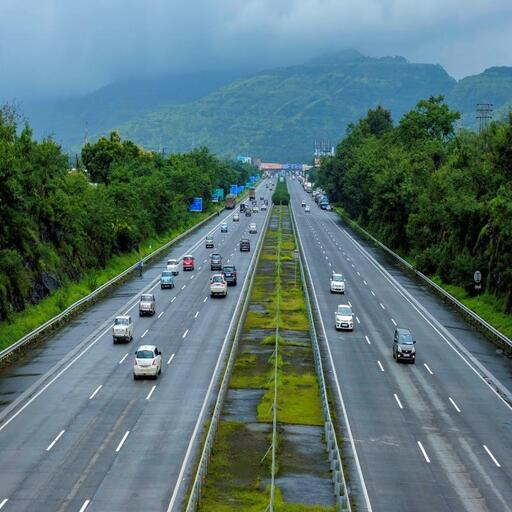

In [34]:
cv2_imshow(image)

In [35]:
from pycocotools.coco import COCO
# Initialize the COCO api for instance annotations
coco=COCO("/content/roads_coco/annotations/train.json")

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [36]:
 img_info = coco.loadImgs([1])[0]
 img_info

{'coco_url': '',
 'date_captured': 0,
 'file_name': '1.jpg',
 'flickr_url': '',
 'height': 512,
 'id': 1,
 'license': 0,
 'width': 512}

In [37]:
annIds = coco.getAnnIds(imgIds=[1], catIds=[1], iscrowd=None) 
anns = coco.loadAnns(annIds)

In [38]:
anns

[{'area': 53933.0,
  'attributes': {'occluded': False},
  'bbox': [2.45, 174.32, 276.43, 334.12],
  'category_id': 1,
  'id': 1,
  'image_id': 1,
  'iscrowd': 0,
  'segmentation': [[269.27,
    174.32,
    2.45,
    359.41,
    2.45,
    506.04,
    194.75,
    508.44,
    278.88,
    187.54]]},
 {'area': 47198.0,
  'attributes': {'occluded': False},
  'bbox': [286.09, 171.91, 225.91, 336.53],
  'category_id': 1,
  'id': 2,
  'image_id': 1,
  'iscrowd': 0,
  'segmentation': [[286.09,
    171.91,
    300.51,
    171.91,
    512.0,
    343.0,
    512.0,
    428.24,
    509.64,
    508.44,
    348.59,
    507.24]]}]

In [9]:
anns[0]['bbox']

[2.45, 174.32, 276.43, 334.12]

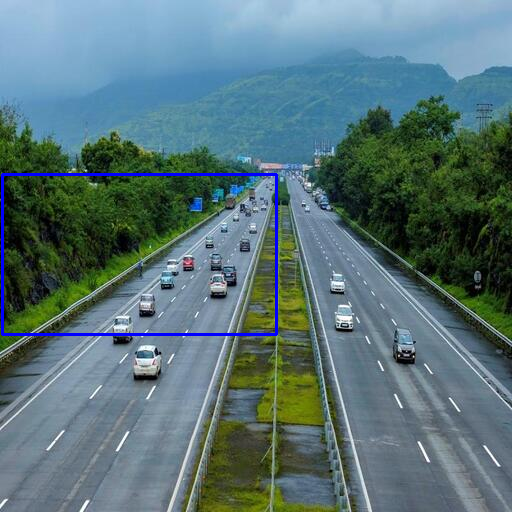

In [39]:
from google.colab.patches import cv2_imshow
image=cv2.rectangle(image, (2, 174), (276, 334), (255,0,0), 2)
cv2_imshow(image)

In [17]:
class_labels=['road']

In [15]:
anns[0]['bbox']

[2.45, 174.32, 276.43, 334.12]

In [40]:
transformed = transform(image=image, bboxes=[anns[0]['bbox']], class_labels=class_labels)
transformed_image = transformed['image']
transformed_bboxes = transformed['bboxes']

In [41]:
transformed['bboxes']

[(1.9140625000000002, 136.1875, 215.9609375, 261.03125)]

In [44]:
image.shape

(512, 512, 3)

In [43]:
transformed['image'].shape

(400, 400, 3)

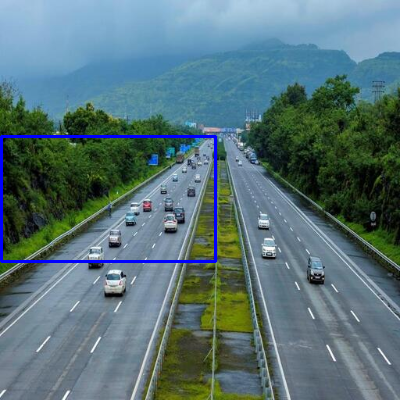

In [42]:
transformed['image']=cv2.rectangle(transformed['image'], (1, 136), (215, 261), (255,0,0), 2)
cv2_imshow(transformed['image'])

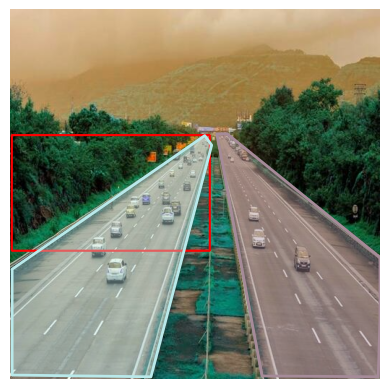

In [45]:
import matplotlib.pyplot as plt
# Load and display instance annotations
plt.imshow(image)
plt.axis('off')
annIds = coco.getAnnIds(imgIds=[1], catIds=[1], iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

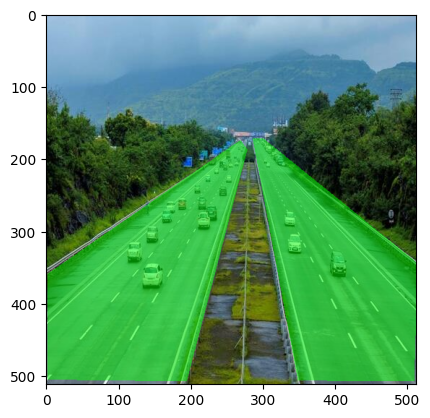

In [50]:
import numpy as np
mask = np.zeros((image.shape[0], image.shape[1]), np.float32)
for i in range(len(anns)):
  pixel_value = 255
  mask = np.maximum(coco.annToMask(anns[i]) * pixel_value, mask)
#Img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hl = np.zeros((Img.shape[0], Img.shape[1], 3), np.uint8)
hl[:] = (0, 255, 0)
if 255 in mask:
  Img[mask == 255] = cv2.addWeighted(hl[mask == 255], 0.3,Img[mask == 255], 0.7, 0)
plt.imshow(Img)

In [70]:
transform_1 = A.Compose([
    A.geometric.resize.Resize(400,400),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])

In [80]:
transformed = transform_1(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']

In [81]:
transformed_image = cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB)

In [82]:
hl = np.zeros((transformed_image.shape[0], transformed_image.shape[1], 3), np.uint8)
hl[:] = (0, 255, 0)

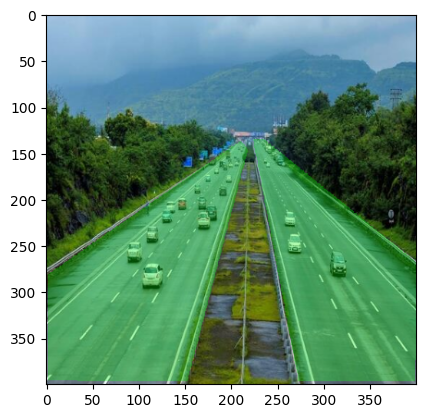

In [83]:
transformed_image[transformed_mask == 255] = cv2.addWeighted(hl[transformed_mask == 255], 0.3,transformed_image[transformed_mask == 255], 0.7, 0)
plt.imshow(transformed_image)